# Olist - Marketing and Retail Analytics

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#importing libraries for model building
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [6]:
customers = pd.read_excel("Customers.xlsx")

In [7]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_items = pd.read_excel("Order_items.xlsx")
payments = pd.read_excel("Payments.xlsx")
product = pd.read_excel("Products.xlsx")

In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [10]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
product.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [12]:
orders = pd.read_excel("Orders.xlsx")

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [14]:
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [17]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
product.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [19]:
orders.drop(['order_delivered_timestamp'],axis = 1,inplace = True)

In [20]:
orders.drop(['order_approved_at'],axis = 1,inplace = True)

In [21]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [22]:
product[product['product_category_name'].isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
8149,17823ffd2de8234f0e885a71109613a4,NaN,3750.0,42.0,20.0,24.0
8203,c230b471b7e21ff9060e68ee154afd70,NaN,200.0,16.0,5.0,11.0
8230,fe34503c6bccf918db601aaafd4a975a,NaN,3000.0,16.0,21.0,19.0
8291,0c877471e35049402bca235e06cb8063,NaN,10750.0,34.0,20.0,30.0


### Merge

In [23]:
order_items_products = pd.merge(order_items,product,on='product_id')

In [24]:
order_items_products

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,toys,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,toys,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,watches_gifts,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,toys,2700.0,60.0,15.0,15.0


In [25]:
df2 = pd.merge(order_items_products,orders,on='order_id')
df3 = pd.merge(df2,customers,on='customer_id')
df = pd.merge(df3,payments,on='order_id')

In [26]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,...,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-09-13 08:59:02,2017-09-29,28013,campos dos goytacazes,RJ,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,...,delivered,2017-06-28 11:52:20,2017-07-26,75800,jatai,GO,1,wallet,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,...,delivered,2018-05-18 10:25:53,2018-06-07,30720,belo horizonte,MG,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,...,delivered,2017-08-01 18:38:42,2017-08-25,83070,sao jose dos pinhais,PR,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-08-10 21:48:40,2017-09-01,36400,conselheiro lafaiete,MG,1,credit_card,4,72.19


In [27]:
df.shape

(127595, 22)

In [28]:
df.isnull().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
product_category_name            476
product_weight_g                  25
product_length_cm                 25
product_height_cm                 25
product_width_cm                  25
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
dtype: int64

In [29]:
df.drop_duplicates()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,...,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-09-13 08:59:02,2017-09-29,28013,campos dos goytacazes,RJ,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,...,delivered,2017-06-28 11:52:20,2017-07-26,75800,jatai,GO,1,wallet,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,...,delivered,2018-05-18 10:25:53,2018-06-07,30720,belo horizonte,MG,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,...,delivered,2017-08-01 18:38:42,2017-08-25,83070,sao jose dos pinhais,PR,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-08-10 21:48:40,2017-09-01,36400,conselheiro lafaiete,MG,1,credit_card,4,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127590,ffea406a848c8afe4dec22bf6290ba00,1,801a695ff5c0c14970a71a4ceb70989e,48162d548f5b1b11b9d29d1e01f75a61,146.9,15.20,toys,350.0,18.0,15.0,...,delivered,2017-03-15 17:16:36,2017-04-05,38411,uberlandia,MG,1,wallet,1,162.10
127591,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,toys,6700.0,35.0,12.0,...,delivered,2018-07-13 20:04:05,2018-08-07,28740,conceicao de macabu,RJ,1,credit_card,1,181.10
127592,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,watches_gifts,400.0,19.0,9.0,...,delivered,2017-06-01 16:53:03,2017-06-26,27261,volta redonda,RJ,1,credit_card,1,756.91
127593,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,toys,2700.0,60.0,15.0,...,delivered,2017-12-18 16:33:07,2018-01-24,59955,tenente ananias,RN,1,credit_card,7,273.92


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127595 entries, 0 to 127594
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       127595 non-null  object        
 1   order_item_id                  127595 non-null  int64         
 2   product_id                     127595 non-null  object        
 3   seller_id                      127595 non-null  object        
 4   price                          127595 non-null  float64       
 5   shipping_charges               127595 non-null  float64       
 6   product_category_name          127119 non-null  object        
 7   product_weight_g               127570 non-null  float64       
 8   product_length_cm              127570 non-null  float64       
 9   product_height_cm              127570 non-null  float64       
 10  product_width_cm               127570 non-null  float64       
 11  

In [31]:
df_missing = df.count()/len(df)
df_missing = (1-df_missing)*100
df_missing.sort_values(ascending = False)

product_category_name            0.373055
product_weight_g                 0.019593
product_length_cm                0.019593
product_height_cm                0.019593
product_width_cm                 0.019593
order_id                         0.000000
order_estimated_delivery_date    0.000000
payment_installments             0.000000
payment_type                     0.000000
payment_sequential               0.000000
customer_state                   0.000000
customer_city                    0.000000
customer_zip_code_prefix         0.000000
customer_id                      0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
order_item_id                    0.000000
shipping_charges                 0.000000
price                            0.000000
seller_id                        0.000000
product_id                       0.000000
payment_value                    0.000000
dtype: float64

In [32]:
df.shape

(127595, 22)

In [33]:
df.isnull().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
product_category_name            476
product_weight_g                  25
product_length_cm                 25
product_height_cm                 25
product_width_cm                  25
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
dtype: int64

In [34]:
df = df.dropna(subset=['product_category_name'])

In [35]:
df.shape

df.isnull().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
price                             0
shipping_charges                  0
product_category_name             0
product_weight_g                 25
product_length_cm                25
product_height_cm                25
product_width_cm                 25
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
dtype: int64

In [36]:
df = df.dropna(subset=['product_weight_g'])

In [37]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [38]:
df.shape

(127094, 22)

In [39]:
df.isnull().sum().sum()

0

In [40]:
df.product_category_name.value_counts()

toys                                 95699
health_beauty                         3389
bed_bath_table                        3094
sports_leisure                        2641
furniture_decor                       2504
                                     ...  
fashion_childrens_clothes                2
furniture_mattress_and_upholstery        2
diapers_and_hygiene                      1
security_and_services                    1
home_comfort_2                           1
Name: product_category_name, Length: 70, dtype: int64

In [41]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

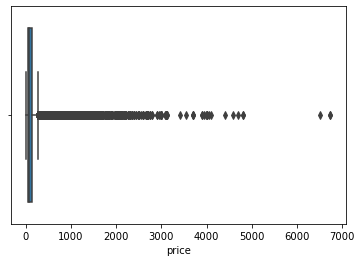

In [42]:
sns.boxplot(df.price)
plt.show()

In [43]:
df.shape

(127094, 22)

In [44]:
df = df[df['order_status'] == 'delivered']

In [45]:
df.shape

(124352, 22)

In [46]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,...,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-09-13 08:59:02,2017-09-29,28013,campos dos goytacazes,RJ,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,...,delivered,2017-06-28 11:52:20,2017-07-26,75800,jatai,GO,1,wallet,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,...,delivered,2018-05-18 10:25:53,2018-06-07,30720,belo horizonte,MG,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,...,delivered,2017-08-01 18:38:42,2017-08-25,83070,sao jose dos pinhais,PR,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,...,delivered,2017-08-10 21:48:40,2017-09-01,36400,conselheiro lafaiete,MG,1,credit_card,4,72.19


In [47]:
# #Deduplication of entries
# df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp'}, keep='first', inplace=False)
# df=df.reindex()
# df.head()

In [48]:
df.to_excel("final_dataset.xlsx",index = False)

In [49]:
df.shape

(124352, 22)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124352 entries, 0 to 127594
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       124352 non-null  object        
 1   order_item_id                  124352 non-null  int64         
 2   product_id                     124352 non-null  object        
 3   seller_id                      124352 non-null  object        
 4   price                          124352 non-null  float64       
 5   shipping_charges               124352 non-null  float64       
 6   product_category_name          124352 non-null  object        
 7   product_weight_g               124352 non-null  float64       
 8   product_length_cm              124352 non-null  float64       
 9   product_height_cm              124352 non-null  float64       
 10  product_width_cm               124352 non-null  float64       
 11  

In [51]:
df['product_category_name'][df['product_category_name'].isin(('toys','bed_bath_table'))]

0                   toys
1                   toys
2                   toys
3                   toys
4                   toys
               ...      
127588              toys
127590              toys
127591              toys
127593              toys
127594    bed_bath_table
Name: product_category_name, Length: 96718, dtype: object

In [71]:
df_temp = df.groupby(['product_category_name'])['order_id'].count().sort_values(ascending = False)
df_temp = df_temp.to_frame().rename(columns={'order_id':'orders'})
df_temp

,orders
product_category_name,
toys,93660
health_beauty,3299
bed_bath_table,3058
sports_leisure,2578
furniture_decor,2453
...,...
fashion_childrens_clothes,2
furniture_mattress_and_upholstery,2
security_and_services,1


In [72]:
df_temp[df_temp['orders']>5]

,orders
product_category_name,
toys,93660
health_beauty,3299
bed_bath_table,3058
sports_leisure,2578
furniture_decor,2453
...,...
dvds_blu_ray,14
party_supplies,12
flowers,11


In [81]:
df_temp.to_excel("Productcatmorethan5.xlsx")

In [74]:
basket = df.groupby(['order_id','product_category_name'])['product_id'].count().unstack().reset_index().fillna(0).set_index('order_id')
basket

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
def encode_data(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

basket_encode = basket.applymap(encode_data)
basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
# basket_filter = basket_encode[(basket_encode > 0).sum(axis = 1)>=2]
# basket_filter

In [77]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [78]:
freq_items = apriori(basket_encode, min_support = 0.0001, 
                     use_colnames = True).sort_values('support',ascending=False).reset_index(drop=True)
freq_items['length'] = freq_items['itemsets'].apply(lambda x:len(x))
freq_items

,support,itemsets,length
0,0.758588,(toys),1
1,0.029026,(health_beauty),1
2,0.024076,(bed_bath_table),1
3,0.021174,(sports_leisure),1
4,0.019625,(computers_accessories),1
...,...,...,...
74,0.000125,(dvds_blu_ray),1
75,0.000125,"(toys, construction_tools_construction)",2
76,0.000114,"(toys, costruction_tools_garden)",2
77,0.000114,"(luggage_accessories, toys)",2


In [79]:
basket_association = association_rules(freq_items,metric='lift',
                 min_threshold=0.00000000001).sort_values('lift',ascending=False).reset_index(drop=True)
basket_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(costruction_tools_garden),(toys),0.000842,0.758588,0.000114,0.135802,0.179020,-0.000525,0.279349
1,(toys),(costruction_tools_garden),0.758588,0.000842,0.000114,0.000151,0.179020,-0.000525,0.999308
2,(toys),(bed_bath_table),0.758588,0.024076,0.003026,0.003989,0.165705,-0.015237,0.979833
3,(bed_bath_table),(toys),0.024076,0.758588,0.003026,0.125702,0.165705,-0.015237,0.276121
4,(fashion_bags_accessories),(toys),0.004202,0.758588,0.000426,0.101485,0.133782,-0.002761,0.268679
5,(toys),(fashion_bags_accessories),0.758588,0.004202,0.000426,0.000562,0.133782,-0.002761,0.996358
6,(toys),(furniture_decor),0.758588,0.017898,0.001591,0.002098,0.117194,-0.011986,0.984166
7,(furniture_decor),(toys),0.017898,0.758588,0.001591,0.088902,0.117194,-0.011986,0.264968
8,(construction_tools_construction),(toys),0.002174,0.758588,0.000125,0.057416,0.075688,-0.001524,0.256118
9,(toys),(construction_tools_construction),0.758588,0.002174,0.000125,0.000165,0.075688,-0.001524,0.997991


In [82]:
basket_association = basket_association[ (basket_association['lift'] >= 0.04) &
        (basket_association['confidence'] >= 0.05)]
basket_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(costruction_tools_garden),(toys),0.000842,0.758588,0.000114,0.135802,0.179020,-0.000525,0.279349
3,(bed_bath_table),(toys),0.024076,0.758588,0.003026,0.125702,0.165705,-0.015237,0.276121
4,(fashion_bags_accessories),(toys),0.004202,0.758588,0.000426,0.101485,0.133782,-0.002761,0.268679
7,(furniture_decor),(toys),0.017898,0.758588,0.001591,0.088902,0.117194,-0.011986,0.264968
8,(construction_tools_construction),(toys),0.002174,0.758588,0.000125,0.057416,0.075688,-0.001524,0.256118
10,(luggage_accessories),(toys),0.002028,0.758588,0.000114,0.056410,0.074362,-0.001424,0.255845
12,(garden_tools),(toys),0.008549,0.758588,0.000468,0.054745,0.072166,-0.006017,0.255394
15,(computers_accessories),(toys),0.019625,0.758588,0.001071,0.054584,0.071955,-0.013816,0.255350
17,(stationery),(toys),0.005897,0.758588,0.000312,0.052910,0.069748,-0.004161,0.254899
18,(pet_shop),(toys),0.004774,0.758588,0.000239,0.050109,0.066056,-0.003382,0.254147


In [83]:
basket_association.to_excel("basket.xlsx")